In [ ]:
# Desafio (RE)START DATA SCIENCE | 30/11 a 04/12/21 
# Organizado por Data Girls Neuron

# Participante: Nathália Santiago | Dezembro/2021

In [ ]:
#About this Dataset: Fashion Clothing Product Catalog from Myntra.com
#Myntra is a major Indian fashion e-commerce company headquartered in Bengaluru, Karnataka, India.] 
#The company was founded in 2007 to sell personalized gift items. In May 2014, Myntra.com was acquired by Flipkart.

#Acknowledgements
#Myntra.com and CrawlFeeds.com
#Data Collection Method: Scraping and PreProcessing

#LINK ORIGINAL: https://www.kaggle.com/shivamb/fashion-clothing-products-catalog

In [ ]:
#importar bibliotecas
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn # modelos
import plotly.express as px

In [ ]:
#importar dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/myntra_products_catalog.csv')

In [ ]:
#verificar linhas x colunas
df.shape

(12491, 8)

In [ ]:
#verficar nome das colunas
df.columns

Index(['ProductID', 'ProductName', 'ProductBrand', 'Gender', 'Price (INR)',
       'NumImages', 'Description', 'PrimaryColor'],
      dtype='object')

In [ ]:
#informações do dataframe: colunas x tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     12491 non-null  int64 
 1   ProductName   12491 non-null  object
 2   ProductBrand  12491 non-null  object
 3   Gender        12491 non-null  object
 4   Price (INR)   12491 non-null  int64 
 5   NumImages     12491 non-null  int64 
 6   Description   12491 non-null  object
 7   PrimaryColor  11597 non-null  object
dtypes: int64(3), object(5)
memory usage: 780.8+ KB


In [ ]:
#descrições gerais do dataframe
df.describe()

,ProductID,Price (INR),NumImages
count,1.249100e+04,12491.000000,12491.000000
mean,9.917160e+06,1452.660956,4.913698
std,1.438006e+06,2118.503976,1.092333
min,1.012060e+05,90.000000,1.000000
25%,1.006215e+07,649.000000,5.000000
50%,1.015463e+07,920.000000,5.000000
75%,1.021565e+07,1499.000000,5.000000
max,1.027514e+07,63090.000000,10.000000


In [ ]:
#visualização das primeiras linhas do dataframe
df.head()

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White


In [ ]:
#verificando quais colunas possuem valores nulos
df.isnull().sum()

ProductID         0
ProductName       0
ProductBrand      0
Gender            0
Price (INR)       0
NumImages         0
Description       0
PrimaryColor    894
dtype: int64

In [ ]:
#listando apenas a coluna com valores nulos
df['PrimaryColor'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
12486    False
12487    False
12488    False
12489     True
12490    False
Name: PrimaryColor, Length: 12491, dtype: bool

In [ ]:
#substituição dos valores nulos da coluna 'PrimaryColor' por 'Não Especificado'
df['PrimaryColor'].fillna(value = "Not Specified", inplace=True)

In [ ]:
#verificando se valores foram preenchidos e se ainda possui nulos a tratar no dataframe
df.isnull().sum()

ProductID       0
ProductName     0
ProductBrand    0
Gender          0
Price (INR)     0
NumImages       0
Description     0
PrimaryColor    0
dtype: int64

In [ ]:
#Verificar a quantidade de categorias dentro de cada coluna

In [ ]:
print(df['ProductName'].nunique())
print(df['ProductName'].unique())

10761
['DKNY Unisex Black & Grey Printed Medium Trolley Bag'
 'EthnoVogue Women Beige & Grey Made to Measure Custom Made Kurta Set with Jacket'
 'SPYKAR Women Pink Alexa Super Skinny Fit High-Rise Clean Look Stretchable Cropped Jeans'
 ... '612 league Girls Navy Blue & White Printed Regular Fit Denim Shorts'
 'Bvlgari Men Aqva Pour Homme Marine Eau de Toilette 150ml'
 'Pepe Jeans Men Black & Grey Striped Polo Collar T-shirt']


In [ ]:
print(df['ProductBrand'].nunique())
print(df['ProductBrand'].unique())

677
['DKNY' 'EthnoVogue' 'SPYKAR' 'Raymond' 'Parx' 'SHOWOFF' 'Kenneth Cole'
 'Police' 'Vishudh' 'Being Human' 'Homesake' 'SEJ by Nisha Gupta'
 'YAK YAK' 'PARFAIT' 'Michael Kors' 'HIGHLANDER' 'JEWEL JUNCTION' 'ID'
 'Story@home' 'Gini and Jony' 'Sera' 'AccessHer' 'Alcis'
 'Difference of Opinion' 'Tokyo Talkies' 'ANNA SUI' 'her by invictus'
 'Soie' 'Lara Karen' 'Urban Dog' 'ahilya' 'VASTRAMAY' 'Campus Sutra'
 'FIDO DIDO' 'MIAH Decor' 'BuckleUp' 'Peter England' 'AIGNER' 'Lady Lyka'
 'Park Avenue' 'Roadster' 'U.S. Polo Assn. Denim Co.' 'Sweet Dreams'
 'Kazo' 'Stylo Bug' 'Bvlgari' 'Qraa Men' 'GAS' 'WITH' 'ZUSH'
 'JBN Creation' 'U.S. Polo Assn. Kids' 'DressBerry' 'ColorPlus' 'Lakme'
 'Allen Solly Woman' 'Palm Tree' 'Arrow' 'DAVID BECKHAM' 'MANGO' 'Carrera'
 'ROMEE' 'TAYHAA' 'Ishin' 'Shoe Couture' 'HARBORNBAY' 'Keds' 'Rozia'
 'Aj DEZInES' 'Monte Carlo' 'even' 'ether' 'Crimsoune Club'
 'Russell Athletic' 'MIMOSA' 'Puma' 'Blackberrys' 'Playdate' 'Rocia'
 'Marvel by Wear Your Mind' 'Annabelle by 

In [ ]:
print(df['Gender'].nunique())
print(df['Gender'].unique())

6
['Unisex' 'Women' 'Men' 'Boys' 'Girls' 'Unisex Kids']


In [ ]:
print(df['PrimaryColor'].nunique())
print(df['PrimaryColor'].unique())

28
[' Black' ' Beige' ' Pink' 'Blue' ' White' ' Brown' ' Burgundy' ' Red'
 ' Green' 'Not Specified' ' Maroon' ' Navy' ' Gold' ' Yellow' ' Grey'
 ' Platinum' ' Silver' ' Khaki' ' Mustard' ' Lavender' ' Matte' ' Rose'
 ' Charcoal' ' Purple' ' Orange' ' Peach' ' Magenta' ' Bronze']


In [ ]:
#Hipótese
#Verificar relação entre as variáveis: ProductId; ProductBrand; Price; Gender; PrimaryColor

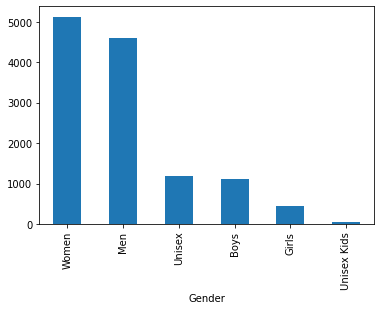

In [ ]:
#Produtos x Gênero
df1=df.groupby('Gender')['ProductID'].count().sort_values(ascending=False).head(30)
df1.plot.bar()

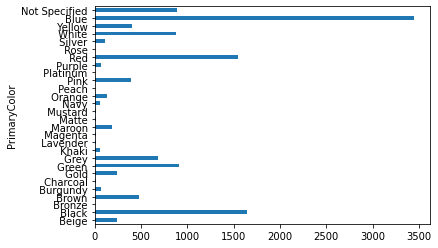

In [ ]:
df.groupby('PrimaryColor')['ProductID'].count().plot.barh()

In [ ]:
#Exemplo do gráfico acima - retirado de notebook do kaggle -
df["PrimaryColor"] = df["PrimaryColor"].apply(lambda x : str(x).strip())
vc = df['PrimaryColor'].value_counts().to_frame().reset_index().head(15)

In [ ]:
fig = px.bar(y=list(vc['PrimaryColor'])[::-1], x=list(vc['index'])[::-1])
fig.update_layout(plot_bgcolor="#fff", title="Most Popular Colors", xaxis_title="", yaxis_title="Counts")
fig.show()

In [ ]:
# Retirado de exemplo do kaggle
fig = px.histogram(x=df[df['Price (INR)'] < 10000]["Price (INR)"])
fig.update_layout(plot_bgcolor="#fff", title="Price Distribution", yaxis_title="", xaxis_title="Counts")
fig.show()

In [ ]:
df['Gender_Code'] = pd.factorize(df['Gender'])[0]
df['PrimaryColor_Code'] = pd.factorize(df['PrimaryColor'])[0]

In [ ]:
df.head()

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor,Gender_Code,PrimaryColor_Code
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black,0,0
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige,1,1
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink,1,2
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue,2,3
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White,2,4


In [ ]:
df['PrimaryColor_Code'].nunique()
df['PrimaryColor_Code'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [ ]:
df['Gender_Code'].nunique()
df['Gender_Code'].unique()

array([0, 1, 2, 3, 4, 5])